In [15]:
from video import *
import numpy as np
from utils import *

In [16]:
video_a = load_video("train/task1/06_query.mp4")
video_b = load_video("train/task1/06_reference.mp4")

In [17]:
a = video_a.get_frame(60).raw()
b = video_b.get_frame(570).raw()

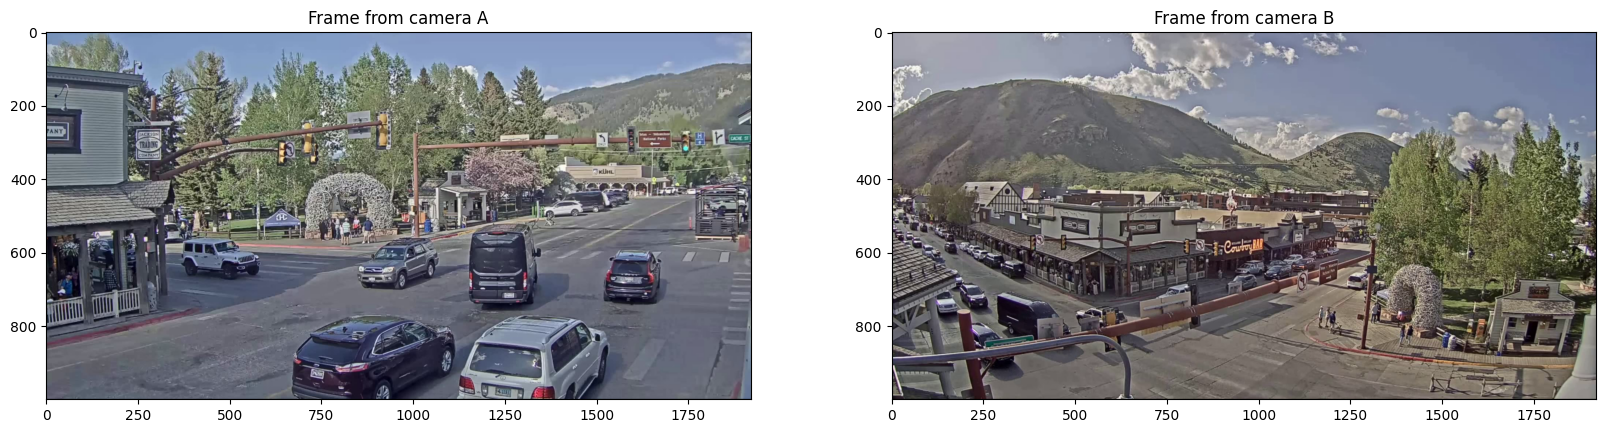

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].set_title("Frame from camera A")
axs[0].imshow(a)
axs[1].set_title("Frame from camera B")
axs[1].imshow(b)
plt.show()

In [19]:
cv.imwrite("correspondences/camera_a.png", cv.cvtColor(a, cv.COLOR_RGB2BGR))
cv.imwrite("correspondences/camera_b.png", cv.cvtColor(b, cv.COLOR_RGB2BGR))

True

In [20]:
coordinates_a = np.array(
    [
        [461, 589],
        [508, 569],
        [594, 516],
        [817, 511],
        [876, 508],
        [651, 312],
        [976, 570],
        [970, 676],
        [1245, 531],
        [1596, 602],
        [874, 785],
        [1090, 896],
        [1741, 316],
        [1670, 623],
        [1593, 273],
    ]
)

coordinates_b = np.array(
    [
        [750, 704],
        [783, 703],
        [1321, 706],
        [1170, 749],
        [1204, 763],
        [798, 575],
        [572, 749],
        [514, 788],
        [340, 720],
        [239, 805],
        [212, 689],
        [211, 742],
        [604, 845],
        [233, 849],
        [821, 699],
    ]
)

F, mask = cv.findFundamentalMat(coordinates_a, coordinates_b, cv.FM_8POINT)
print(F)
print(mask)

[[ 1.5507e-07  7.5617e-07 -0.00043856]
 [ 7.0616e-07  1.6834e-07  -0.0014682]
 [-0.00047537 -0.00018526           1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


Text(0.5, 1.0, 'Camera B')

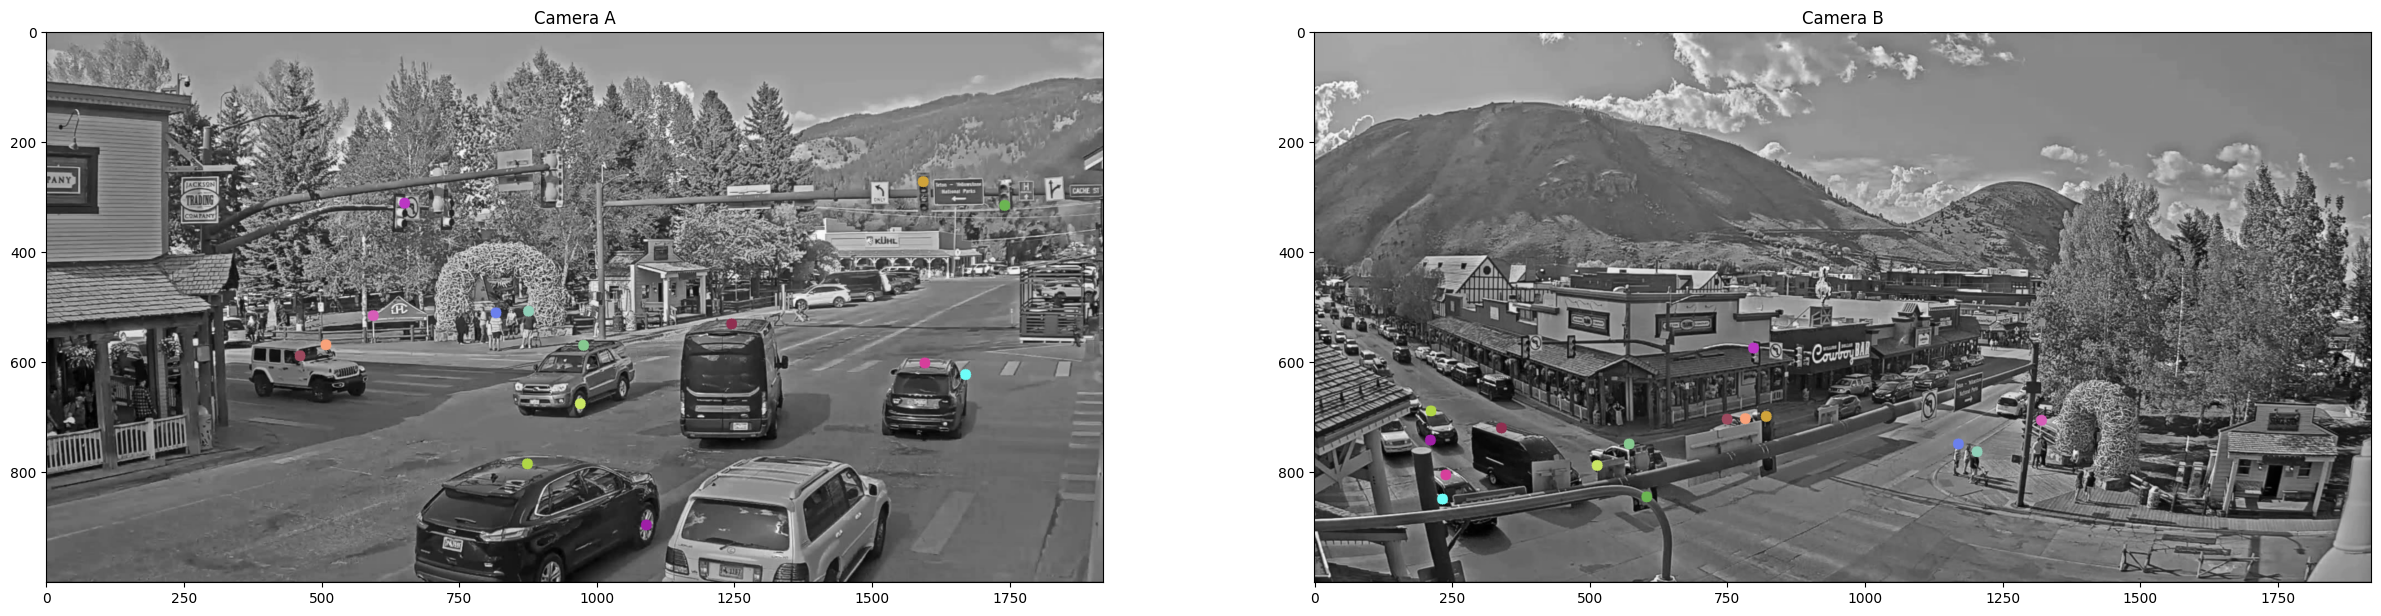

In [21]:
a_points = cv.cvtColor(cv.cvtColor(np.copy(a), cv.COLOR_RGB2GRAY), cv.COLOR_GRAY2RGB)
b_points = cv.cvtColor(cv.cvtColor(np.copy(b), cv.COLOR_RGB2GRAY), cv.COLOR_GRAY2RGB)

colors = [np.random.randint([100, 30, 50], [255, 255, 255]).tolist() for _ in range(len(coordinates_a))]
for i in range(len(coordinates_a)):
    cv.circle(a_points, tuple(coordinates_a[i]), 10, colors[i], -1)
    cv.circle(b_points, tuple(coordinates_b[i]), 10, colors[i], -1)

fig, ax = plt.subplots(1, 2, figsize=(30, 40))
ax[0].imshow(a_points)
ax[0].set_title("Camera A")
ax[1].imshow(b_points)
ax[1].set_title("Camera B")

3.9934894889593124
4.288647599518299
0.7344321459531784
1.2518567889928818
5.816940099000931
1.9673831760883331
1.5504549145698547
1.07663232088089
5.874209642410278
0.49213284254074097
6.930049538612366
6.506029159190009
2.5257983803749084
6.83925461769104
11.626624502241611


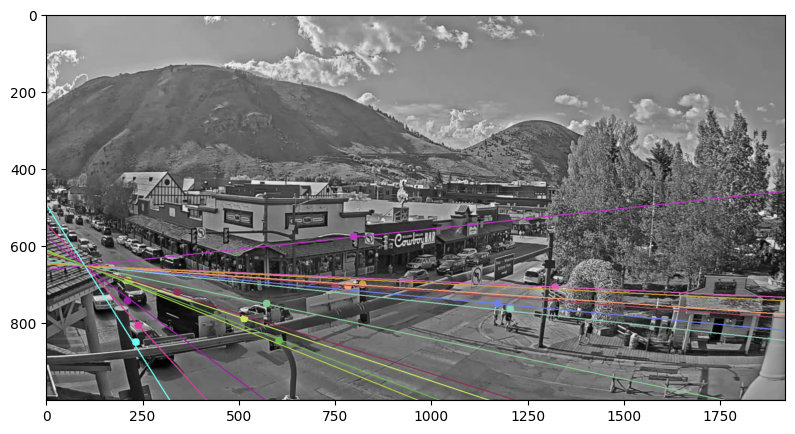

In [22]:
epilines = cv.computeCorrespondEpilines(coordinates_a.reshape(-1, 1, 2), 1, F)

for i, line in enumerate(epilines):
    draw_epiline(line[0], b_points, color=colors[i])
    print(distance_point_to_line(coordinates_b[i], line[0]))

plt.figure(figsize=(10, 5))
plt.imshow(b_points)

8.050986230373383
8.008761048316956
0.7366738319396973
1.179527908563614
5.0252426862716675
3.652650400996208
2.708938717842102
2.0392380380176327
14.556386768817902
0.9509413242340088
53.13676172494888
34.64085257053375
1.0753515362739563
11.291405260562897
6.051204267215983


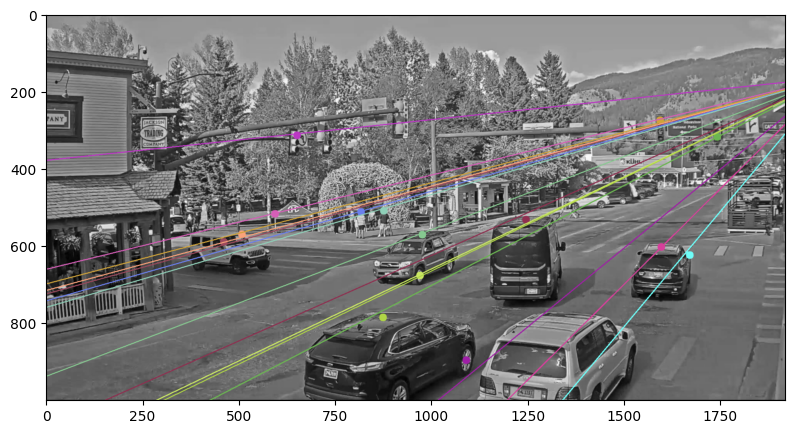

In [23]:
epilines = cv.computeCorrespondEpilines(coordinates_b.reshape(-1, 1, 2), 2, F)

for i, line in enumerate(epilines):
    draw_epiline(line[0], a_points, color=colors[i])
    print(distance_point_to_line(coordinates_a[i], line[0]))

plt.figure(figsize=(10, 5))
plt.imshow(a_points)

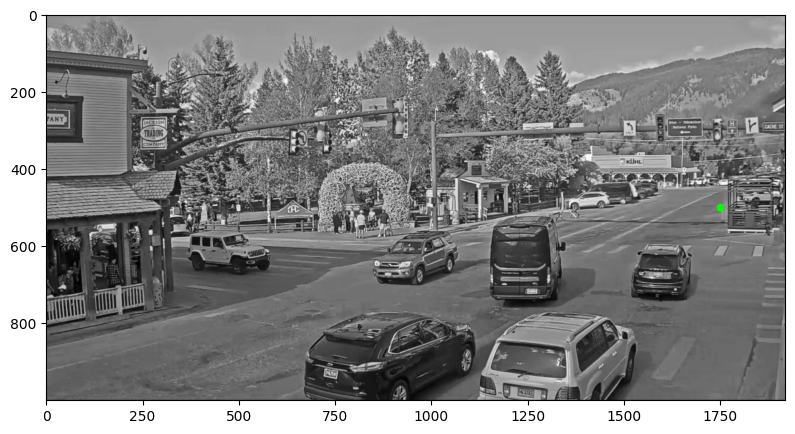

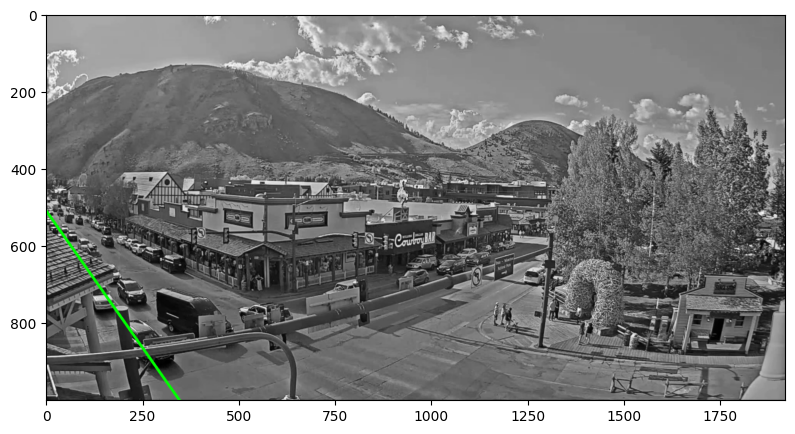

In [24]:
a_copy = cv.cvtColor(cv.cvtColor(np.copy(a), cv.COLOR_RGB2GRAY), cv.COLOR_GRAY2RGB)
b_copy = cv.cvtColor(cv.cvtColor(np.copy(b), cv.COLOR_RGB2GRAY), cv.COLOR_GRAY2RGB)

point = [1750, 500]
cv.circle(a_copy, tuple(point), 10, [0, 255, 0], -1)

epiline = cv.computeCorrespondEpilines(np.array([point]).reshape(-1, 1, 2), 1, F)[0][0]
x0, y0 = map(int, [0, -epiline[2] / epiline[1]])
x1, y1 = map(int, [b.shape[1], -(epiline[2] + epiline[0] * b.shape[1]) / epiline[1]])
cv.line(b_copy, (x0, y0), (x1, y1), [0, 255, 0], 5)


plt.figure(figsize=(10, 5))
plt.imshow(a_copy)
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(b_copy)
plt.show()

In [25]:
np.save("fundamental_matrices/AB.npy", F)